<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/LR_with_predict_proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando Banco de Dados


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 808.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [3]:
import yfinance as yahooFinance
import pandas as pd
 
GetFacebookInformation = yahooFinance.Ticker("TSL")
 
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = pd.DataFrame(GetFacebookInformation.history(period="max"))

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-08-09 00:00:00-04:00,25.100000,25.100000,24.150000,24.326,6600,0.0,0.0,0.0
2022-08-10 00:00:00-04:00,25.320000,25.438000,24.480000,25.438,2600,0.0,0.0,0.0
2022-08-11 00:00:00-04:00,25.500000,25.500000,24.562000,24.562,1400,0.0,0.0,0.0
2022-08-12 00:00:00-04:00,24.500000,26.000000,24.500000,25.980,4200,0.0,0.0,0.0
2022-08-15 00:00:00-04:00,26.280001,27.379999,26.280001,27.020,27500,0.0,0.0,0.0


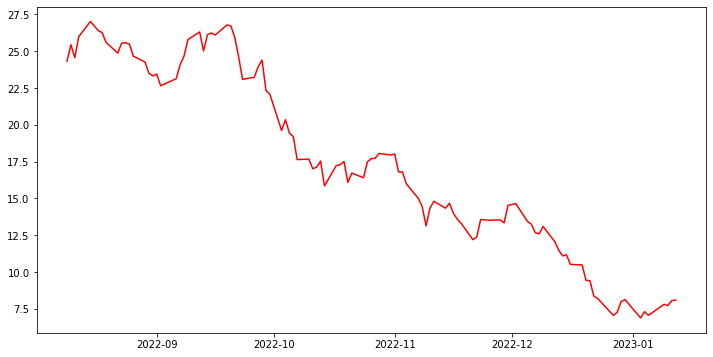

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df.Close.values, c='r')
plt.show()

In [5]:
df.drop(columns='Dividends', inplace=True)
df.drop(columns='Stock Splits', inplace=True)
df.drop(columns='Capital Gains', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-09 00:00:00-04:00,25.100000,25.100000,24.150000,24.326,6600
2022-08-10 00:00:00-04:00,25.320000,25.438000,24.480000,25.438,2600
2022-08-11 00:00:00-04:00,25.500000,25.500000,24.562000,24.562,1400
2022-08-12 00:00:00-04:00,24.500000,26.000000,24.500000,25.980,4200
2022-08-15 00:00:00-04:00,26.280001,27.379999,26.280001,27.020,27500
...,...,...,...,...,...
2023-01-06 00:00:00-05:00,6.550000,7.280000,6.400000,7.250,59800
2023-01-09 00:00:00-05:00,7.670000,8.076000,7.640000,7.810,19300
2023-01-10 00:00:00-05:00,7.900000,8.040000,7.455000,7.730,50300


In [6]:
df.Close = df.Close.shift(-1)

df.dropna(inplace=True)

df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-09 00:00:00-04:00,25.10,25.100,24.15,25.438,6600
2022-08-10 00:00:00-04:00,25.32,25.438,24.48,24.562,2600


In [7]:
df.shape

(108, 5)

In [8]:
i = 0
for d in df.iterrows():
  i += 1
  if i > 1 and d[1]['Close'] > d_past[1]['Close']: df.loc[d[0], 'Close_R'] = 1
  elif i > 1 and d[1]['Close'] <= d_past[1]['Close']: df.loc[d[0], 'Close_R'] = 0
  d_past = d

df.dropna(inplace=True)
df.head(3)

,Open,High,Low,Close,Volume,Close_R
Date,,,,,,
2022-08-10 00:00:00-04:00,25.32,25.438,24.480,24.562,2600,0.0
2022-08-11 00:00:00-04:00,25.50,25.500,24.562,25.980,1400,1.0
2022-08-12 00:00:00-04:00,24.50,26.000,24.500,27.020,4200,1.0


# Pipeline e CROSS VALIDATION


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = df.drop(columns=['Close','Close_R'], axis=1)
y = df['Close_R']

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Criando uma pipeline SGDClassifier:
model = make_pipeline(StandardScaler(), SGDClassifier())
scores = cross_val_score(model, X_train, y_train, cv=3)
print('SGDC Classifier')
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
###################################################################################
# Criando uma pipeline LogisticRegression:
model = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(model, X_train, y_train, cv=3)
print('LogisticRegression')
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
###################################################################################
# Criando uma pipeline LinearSVC:
model = make_pipeline(StandardScaler(), LinearSVC())
scores = cross_val_score(model, X_train, y_train, cv=3)
print('LinearSVC')
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
###################################################################################
# Criando uma pipeline RandomForestClassifier:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
scores = cross_val_score(model, X_train, y_train, cv=3)
print('RandomForestClassifier')
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))


KeyError: ignored

# GRID

In [10]:
# Bibliotecas já importadas acima.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")

X = df.drop(columns=['Close','Close_R'], axis=1)
y = df['Close_R']

X_train, X_test, y_train, y_test = train_test_split(X,y)

#------------------------------------------------------------------------------------------------
# RandomForestClassifier:
print('RandomForestClassifier')
modelrf = Pipeline([( "scaler" , StandardScaler()),("rf",RandomForestClassifier())])
    # pipeline.fit(X_train,y_train) # pipeline.score(X_train,y_train)
parameters_rf = {
  'n_estimators':[1,10,100,1000],
  'min_samples_split': [2,3,4,5]
  }
grid_pipeline = GridSearchCV(modelrf['rf'], parameters_rf)
grid_pipeline.fit(X_train, y_train)
print('Melhor configuração: ', grid_pipeline.best_params_)
scores = cross_val_score(RandomForestClassifier(n_estimators=grid_pipeline.best_params_['n_estimators'],min_samples_split=grid_pipeline.best_params_['min_samples_split']), X_train, y_train, cv=5)
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
#------------------------------------------------------------------------------------------------
# SGDClassifier:
print('SGDClassifier')
modelSGDC = Pipeline([( "scaler" , StandardScaler()),("SGDC",SGDClassifier())])
    # pipeline.fit(X_train,y_train) # pipeline.score(X_train,y_train)
parametersSGDC = {
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet']}
grid_pipeline = GridSearchCV(modelSGDC['SGDC'], parametersSGDC)
grid_pipeline.fit(X_train, y_train)
print('Melhor configuração: ', grid_pipeline.best_params_)
scores = cross_val_score(SGDClassifier(loss=grid_pipeline.best_params_['loss'], penalty=grid_pipeline.best_params_['penalty']), X_train, y_train, cv=5)
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
#------------------------------------------------------------------------------------------------
# LinearSVC:
print('LinearSVC')
modelSVC = Pipeline([( "scaler" , StandardScaler()),("SVC",LinearSVC())])
    # pipeline.fit(X_train,y_train) # pipeline.score(X_train,y_train)
parametersSVC = {'penalty': ['l2', 'l1'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': (True, False),
    'C': [0.1,0.5,1,10]}
grid_pipeline = GridSearchCV(modelSVC['SVC'], parametersSVC)
grid_pipeline.fit(X_train, y_train)
print('Melhor configuração: ', grid_pipeline.best_params_)
scores = cross_val_score(LinearSVC(penalty=grid_pipeline.best_params_['penalty'], loss=grid_pipeline.best_params_['loss'], dual=grid_pipeline.best_params_['dual'], C=grid_pipeline.best_params_['C']), X_train, y_train, cv=5)
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
#------------------------------------------------------------------------------------------------
# LogisticRegression:
print('LogisticRegression')
modelLR = Pipeline([( "scaler" , StandardScaler()),("LR",LogisticRegression())])
    # pipeline.fit(X_train,y_train) # pipeline.score(X_train,y_train)
parametersLR = {'penalty': ['l2', 'l1', 'elasticnet'],
    'fit_intercept': (True, False),
    'C': [0.1,0.5,1,10],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid_pipeline = GridSearchCV(modelLR['LR'], parametersLR)
grid_pipeline.fit(X_train, y_train)
print('Melhor configuração: ', grid_pipeline.best_params_)
scores = cross_val_score(LogisticRegression(penalty=grid_pipeline.best_params_['penalty'],fit_intercept=grid_pipeline.best_params_['fit_intercept'],C=grid_pipeline.best_params_['C'],solver=grid_pipeline.best_params_['solver']), X_train, y_train, cv=5)
for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))
#------------------------------------------------------------------------------------------------


RandomForestClassifier
Melhor configuração:  {'min_samples_split': 4, 'n_estimators': 1}
Nota:  44 %
Nota:  75 %
Nota:  56 %
Nota:  50 %
Nota:  56 %
Acurária do modelo: 0.56 (+/- 0.21)

SGDClassifier
Melhor configuração:  {'loss': 'huber', 'penalty': 'elasticnet'}
Nota:  56 %
Nota:  44 %
Nota:  44 %
Nota:  44 %
Nota:  62 %
Acurária do modelo: 0.50 (+/- 0.16)

LinearSVC
Melhor configuração:  {'C': 0.5, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Nota:  50 %
Nota:  44 %
Nota:  56 %
Nota:  56 %
Nota:  69 %
Acurária do modelo: 0.55 (+/- 0.17)

LogisticRegression
Melhor configuração:  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Nota:  56 %
Nota:  50 %
Nota:  50 %
Nota:  56 %
Nota:  69 %
Acurária do modelo: 0.56 (+/- 0.14)



In [82]:
# RandomForestClassifier:
print('RandomForestClassifier')


# Criando uma pipeline SGDClassifier:
modelrf = Pipeline([( "scaler" , StandardScaler()),("rf",LogisticRegression(C=0.1,fit_intercept=True,solver='newton-cg'))])

X = df.drop(columns=['Close','Close_R'], axis=1)
y = df['Close_R']

modelrf['scaler'].fit(X)
X_scale = modelrf['scaler'].transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale,y)



scores = cross_val_score(modelrf['rf'], X_train, y_train, cv=5)

for n in scores:
  print('Nota: ', round(n*100),'%')
print('Acurária do modelo: %0.2f (+/- %0.2f)\n' % (scores.mean(), scores.std() * 2))

RandomForestClassifier
Nota:  50 %
Nota:  50 %
Nota:  56 %
Nota:  62 %
Nota:  50 %
Acurária do modelo: 0.54 (+/- 0.10)



In [ ]:
X_test

In [102]:
modelrf['rf'].fit(X_test,y_test)

win_ = []
loss_ = []

for predic,real in zip(X_test,y_test):
  prob_acerto = 70
  prob_0 = round(modelrf['rf'].predict_proba(predic.reshape(1,-1))[0][0]*100)
  prob_1 = round(modelrf['rf'].predict_proba(predic.reshape(1,-1))[0][1]*100)
  prev = modelrf['rf'].predict(predic.reshape(1,-1))
  print(f"Prev. {round(prev[0])} vs. Real {round(real)} == {'WIN' if prev[0]==real else 'LOSS'}")
  if prev[0]==real and prob_0 > prob_acerto or prob_1 > prob_acerto: win_.append(1)
  elif prev[0]!=real and prob_0 > prob_acerto or prob_1 > prob_acerto: loss_.append(1)
  print(f"{prob_0}% 0 || {prob_1}% 1\n")

print(f'''
  Quantidade de WIN = {sum(win_)}
  Quantidade de LOSS = {sum(loss_)}

  Tentativas = {sum(win_)+sum(loss_)}
        ''')

Prev. 0 vs. Real 1 == LOSS
72% 0 || 28% 1

Prev. 0 vs. Real 0 == WIN
58% 0 || 42% 1

Prev. 0 vs. Real 0 == WIN
75% 0 || 25% 1

Prev. 0 vs. Real 0 == WIN
65% 0 || 35% 1

Prev. 0 vs. Real 1 == LOSS
66% 0 || 34% 1

Prev. 0 vs. Real 1 == LOSS
67% 0 || 33% 1

Prev. 0 vs. Real 0 == WIN
73% 0 || 27% 1

Prev. 0 vs. Real 1 == LOSS
66% 0 || 34% 1

Prev. 0 vs. Real 0 == WIN
59% 0 || 41% 1

Prev. 0 vs. Real 0 == WIN
58% 0 || 42% 1

Prev. 0 vs. Real 0 == WIN
71% 0 || 29% 1

Prev. 0 vs. Real 0 == WIN
59% 0 || 41% 1

Prev. 0 vs. Real 0 == WIN
76% 0 || 24% 1

Prev. 0 vs. Real 1 == LOSS
60% 0 || 40% 1

Prev. 0 vs. Real 1 == LOSS
58% 0 || 42% 1

Prev. 0 vs. Real 0 == WIN
58% 0 || 42% 1

Prev. 0 vs. Real 0 == WIN
73% 0 || 27% 1

Prev. 0 vs. Real 0 == WIN
62% 0 || 38% 1

Prev. 0 vs. Real 1 == LOSS
74% 0 || 26% 1

Prev. 0 vs. Real 1 == LOSS
60% 0 || 40% 1

Prev. 0 vs. Real 0 == WIN
73% 0 || 27% 1

Prev. 0 vs. Real 1 == LOSS
58% 0 || 42% 1

Prev. 0 vs. Real 0 == WIN
71% 0 || 29% 1

Prev. 0 vs. Real 0 == WIN